## Creating a volcano plot 

### Loading libraries 

In [2]:
pip install bioinfokit

     ---------------------------------------- 0.0/88.1 kB ? eta -:--:--
     -------- ----------------------------- 20.5/88.1 kB 330.3 kB/s eta 0:00:01
     ----------------- -------------------- 41.0/88.1 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 88.1/88.1 kB 828.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59336 sha256=8e4e02a390bdcbb0218318c7bff253c982ecb781921b28fc0e80b5e1054448fe
  Stored in directory: c:\users\amade\appdata\local\pip\cache\wheels\83\cd\9c\8605a43f2310bfb74df791d943a9b3aef65377ed484de98bdc
Successfully built bioinfokit
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from adjustText import adjust_text
import random 
from bioinfokit import analys, visuz
print('I am ready to proceed')

I am ready to proceed


### Loading data 

This data belong to my current lab right now so it can not be shared, however, this step is very general and you can replace your data in here. My data is transcriptomic profiles of WT hematopoietic stem cells and Ing4-/- hematopoeitci stem cells. 

In [4]:
df = pd.read_excel("C:/Users/amade/Desktop/Total_Genes.xlsx ").dropna() # Loading the dataset 
df["nlog10"]=-np.log10(df.FDR) # Transforming the column FDR to log base-10
df

,ENSEMBL ID,MGI,HGNC,logFC,logCPM,PValue,FDR,Tgw.Disp,UpDown.Tgw,WT.ST.HSC,WT.LT.HSC,Null.ST.HSC,Null.LT.HSC,LogFC,nlog10
6,ENSMUSG00000028649,Macf1,MACF1,4.618002,7.169502,1.280000e-20,1.740000e-17,0.085667,1,1705,1923,363,393,-4.618002,16.759451
7,ENSMUSG00000033004,Mycbp2,MYCBP2,5.758940,6.523179,3.030000e-18,3.600000e-15,0.134603,1,1062,1309,88,135,-5.758940,14.443697
8,ENSMUSG00000005893,Nr2c2,NR2C2,6.338956,6.178261,2.960000e-17,2.980000e-14,0.163333,1,752,1128,45,73,-6.338956,13.525784
10,ENSMUSG00000055204,Ankrd17,ANKRD17,3.570841,7.562712,1.960000e-15,1.690000e-12,0.078046,1,2144,2428,911,1057,-3.570841,11.772113
11,ENSMUSG00000035954,Dock4,DOCK4,5.712412,5.671794,1.620000e-13,1.280000e-10,0.183593,1,642,673,61,67,-5.712412,9.892790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9488,ENSMUSG00000001741,Il16,IL16,-0.000726,7.006655,9.995878e-01,1.000000e+00,0.099999,0,857,825,5279,3384,0.000726,-0.000000
9489,ENSMUSG00000034586,Hid1,HID1,0.000822,5.582131,9.998854e-01,1.000000e+00,0.196686,0,334,292,1365,1833,-0.000822,-0.000000
9495,ENSMUSG00000051735,Rinl,RINL,-0.001226,5.096048,1.000000e+00,1.000000e+00,0.241130,0,266,180,1334,963,0.001226,-0.000000
9496,ENSMUSG00000020413,Hus1,HUS1,-0.000890,5.436502,1.000000e+00,1.000000e+00,0.264984,0,238,328,646,2223,0.000890,-0.000000


In [5]:
# Specifying the random list of genes you want to show in the volcano plot. I chose those genes becasue they are relevant in the biology of HSCs 
list_genes=['Rps5','Rps3','Ndufb5','Ndufb9','Cox7b','Cdkn1c','Dock4','Clasp1','Ssh2']

### Ploting 

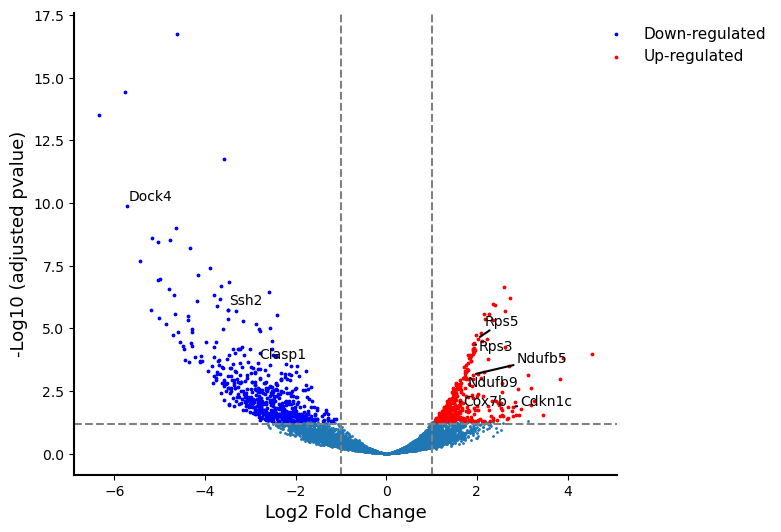

In [33]:
fig, ax = plt.subplots(1,figsize=(7,6)) # Specifying the graph details
plt.scatter(x=df['LogFC'],y=df['FDR'].apply(lambda x:-np.log10(x)),s=1) # Plotting data using LOgFC vs FDR and we apply the a transformation of base 10 

# Highlighting down- or up- regulated genes
down = df[(df['LogFC']<=-1)&(df['FDR']<=0.05)]  # genes downregulated bellow 0.05 FDR & LogFC < 1 
up = df[(df['LogFC']>=1)&(df['FDR']<=0.05)]    # genes upregulated bellow 0.05 FDR  & LogFC > 1 

plt.scatter(x=down['LogFC'],y=down['FDR'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")  # Color the downregulated genes 
plt.scatter(x=up['LogFC'],y=up['FDR'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")   # Color the upregulated genes 

#Putting list of genes on the volcano plot 
text=[]
for gene in list_genes:
    gene_data=df[df['MGI']==gene]
    if not gene_data.empty:
        text.append(plt.text(gene_data['LogFC'].iloc[0], -np.log10(gene_data['FDR']).iloc[0], gene, fontsize=10))
adjust_text(text,arrowprops= dict(arrowstyle='-',lw=1.5,color='k'))

#Specific of the plot 
plt.xlabel("Log2 Fold Change",fontsize=13)
plt.ylabel("-Log10 (adjusted pvalue)",fontsize=13)
plt.axvline(-1,color="grey",linestyle="--")
plt.axvline(1,color="grey",linestyle="--")
plt.axhline(1.2,color="grey",linestyle="--")
plt.grid(False)

# Highlighting the bottom and left axes
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Legend 
plt.legend(loc=1,bbox_to_anchor=(1.3,1),frameon=False,fontsize=11)
plt.show()
